<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-R/blob/main/templado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: Red ejemplo

Nombre: Biología de sistemas

Fecha: 9 de diciembre del 2020

Cargar librerías

In [ ]:
install.packages("deSolve")
library(deSolve)

Declarar la función

In [ ]:
red_ejemplo <- function(time, state, parms) {

  # variables de estado
  x <- state[1]
  y <- state[2]
  xy <- parms[6] - y # a partir de la ecuación de conservación

  # velocidades de reacción
  dx <- parms[1]*parms[2] - parms[3]*x - parms[4]*x*y + parms[5]*xy
  dy <- - parms[4]*x*y + parms[5]*xy

  return(list(c(dx,dy)))
}

Declarar los valores de los parámetros 

In [ ]:
xpre <- 10
kprodEprod <- 0.5
kdegEdeg <- 0.5
kdimEdim <- 10
kdisEdis <- 1
ytot <- 6
p <- c(xpre, kprodEprod, kdegEdeg, kdimEdim, kdisEdis, ytot);p

[1] 10.0  0.5  0.5 10.0  1.0  6.0

Definir condiciones iniciales

In [ ]:
s <- c(0, ytot)

Definir el intervalo de integración 

In [ ]:
tspan <- seq(from = 0, to = 5, by = 0.01)

Invocar el integrador para obtener $x(t)$

In [ ]:
out <- ode(y = s, times = tspan, func = red_ejemplo, parms = p)

Grafiquemos los resultados

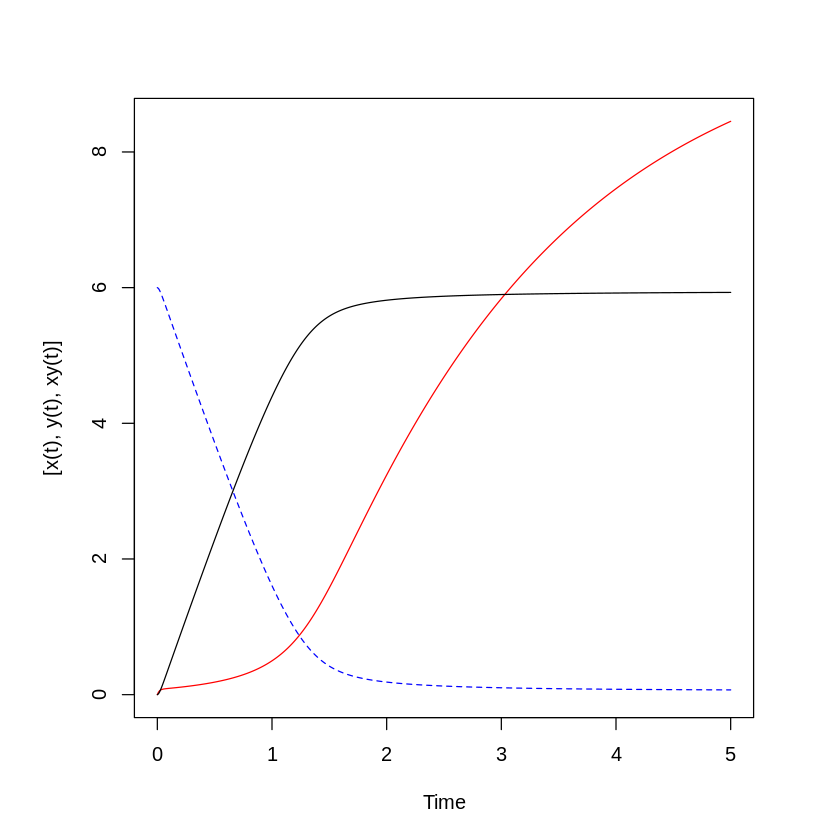

In [ ]:
par(pty = "s")
matplot(out[,1], out[,2:3], type = "l", col = c("red","blue"), xlab = "Time", ylab = "[x(t), y(t), xy(t)]")
lines(out[,1], ytot-out[,3],type = "l", col="black")
legend=c("x(t)", "y(t)", "xy(t)")